# Avocado Price Prediction Analysis

## Objective

The goal of this analysis is to predict the average price of avocados using various regression models. Feature selection was performed using Lasso regularization at different alpha levels to identify the most relevant predictors. The performance of models was compared before and after feature selection.

### Feature Selection Results

Lasso regression was applied with different alpha values to reduce dimensionality while maintaining prediction accuracy.

- **Alpha = 0.0001:** 52 features selected, including TotalVolume, plu4046, plu4225, SmallBags, LargeBags, XLargeBags, type_conventional, and various regional features.

- **Alpha = 0.0005:** 34 features selected, slightly reducing region-based features while keeping key volume and bag type variables.

- **Alpha = 0.002:** 11 features selected, mostly volume-based and specific region indicators.

## Model Performance Comparison

Below is a summary of model performance before and after feature selection at different alpha values.

### Model Performance (alpha=0.0001)

| Model                     | RMSE (Full) | MAE (Full) | R² (Full) | RMSE (Selected) | MAE (Selected) | R² (Selected) |
|---------------------------|------------|------------|----------|----------------|----------------|--------------|
| Linear Regression         | 0.105953   | 0.081696   | 0.593916 | 0.105952       | 0.081687       | 0.593926    |
| Gradient Boosting         | 0.099775   | 0.077331   | 0.639892 | 0.099658       | 0.077286       | 0.640737    |
| Random Forest Regression  | 0.071619   | 0.052636   | 0.814455 | 0.074062       | 0.054744       | 0.801583    |
| XGBoost                  | 0.077965   | 0.058873   | 0.780120 | 0.078898       | 0.059869       | 0.774823    |
| Neural Network Regression | 0.091704   | 0.070489   | 0.695792 | 0.091610       | 0.070169       | 0.696419    |


### Model Performance (alpha=0.0005)

| Model                     | RMSE (Full) | MAE (Full) | R² (Full) | RMSE (Selected) | MAE (Selected) | R² (Selected) |
|---------------------------|------------|------------|----------|----------------|----------------|--------------|
| Linear Regression         | 0.105953   | 0.081696   | 0.593916 | 0.106577      | 0.082227       | 0.589116    |
| Gradient Boosting         | 0.099775   | 0.077331   | 0.639892 | 0.100164       | 0.077851       | 0.637075   |
| Random Forest Regression  | 0.071619   | 0.052636   | 0.814455 | 0.080961       | 0.060216       | 0.762895    |
| XGBoost                  | 0.077965   | 0.058873   | 0.780120 | 0.084449       | 0.064405       | 0.742026    |
| Neural Network Regression | 0.091704   | 0.070489   | 0.695792 | 0.099638       | 0.076929       | 0.640879    |


### Model Performance (alpha=0.002)

| Model                     | RMSE (Full) | MAE (Full) | R² (Full) | RMSE (Selected) | MAE (Selected) | R² (Selected) |
|---------------------------|------------|------------|----------|----------------|----------------|--------------|
| Linear Regression         | 0.105953   | 0.081696   | 0.593916 | 0.112634      | 0.087124       | 0.541085    |
| Gradient Boosting         | 0.099775   | 0.077331   | 0.639892 | 0.104708       | 0.081432       | 0.603401   |
| Random Forest Regression  | 0.071619   | 0.052636   | 0.814455 | 0.100498       | 0.076057      | 0.634656    |
| XGBoost                  | 0.077965   | 0.058873   | 0.780120 | 0.098096       | 0.075482       | 0.651909    |
| Neural Network Regression | 0.091704   | 0.070489   | 0.695792 | 0.109257       | 0.084866       | 0.568195    |

### Observations & Conclusion

#### Feature Selection Impact:

  - At alpha = 0.0001, minimal features were removed, and the selected features performed almost identically to the full dataset.

  - As alpha increased (0.002), fewer features were retained, leading to a slight drop in performance across all models.

  - The best trade-off between model complexity and performance appears at alpha = 0.0005, as it retains a good number of relevant predictors while maintaining high performance.

### Model Comparison:

- Random Forest Regression consistently performed best, achieving the lowest RMSE and highest R² values across all cases.

- XGBoost also performed well but slightly worse than Random Forest.

- Neural Networks had decent results but were outperformed by ensemble methods.

- Linear Regression was the weakest performer, as expected for non-linear relationships.

### Final Recommendation:

- If model interpretability is important, use Lasso Regression with alpha = 0.0005 to balance performance and feature reduction.

- For best prediction accuracy, Random Forest Regression or XGBoost should be chosen, ideally using the alpha = 0.0005 feature set for efficiency.

- Neural networks could be improved further with hyperparameter tuning, but they don't currently outperform tree-based models.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_validate
from scipy.stats import t
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import RobustScaler
%matplotlib inline

# import csv file

In [2]:
avocado_df = pd.read_csv('..\\Dataset\\avocado_cleaned.csv')
avocado_df['Date'] = pd.to_datetime(avocado_df['Date'])
avocado_df.head()

,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,BaltimoreWashington


## Split dataset (To exclude regional level)

In [3]:
# Exclude for the analysis
broad_regions_state = ['TotalUS', 'West', 'SouthCentral', 'Southeast', 'Midsouth', 
                 'GreatLakes', 'Northeast', 'Plains', 'NorthernNewEngland', 'California', 'SouthCarolina']

city_level_data = avocado_df[~avocado_df['region'].isin(broad_regions_state)]

In [4]:
city_level_data.columns

Index(['Date', 'AveragePrice', 'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
       'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags', 'type', 'region'],
      dtype='object')

In [5]:
city_level_data = city_level_data[city_level_data['TotalVolume'] > 0]

In [8]:
# city_level_data[city_level_data['TotalBags'] == 0]

## Explore Data (EDA)

In [6]:
def univariate_analysis(data):
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

    for column in numeric_columns:
        print(f'\nAnalysis for {column}:\n')
        print(data[column].describe())
        
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True, bins=30)
        plt.title(f'Histogram of {column}')
        
        # Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=data[column])
        plt.title(f'Box Plot of {column}')
        
        plt.tight_layout()
        plt.show()


Analysis for AveragePrice:

count    43161.000000
mean         1.434902
std          0.403784
min          0.440000
25%          1.117948
50%          1.400000
75%          1.700000
max          3.440830
Name: AveragePrice, dtype: float64


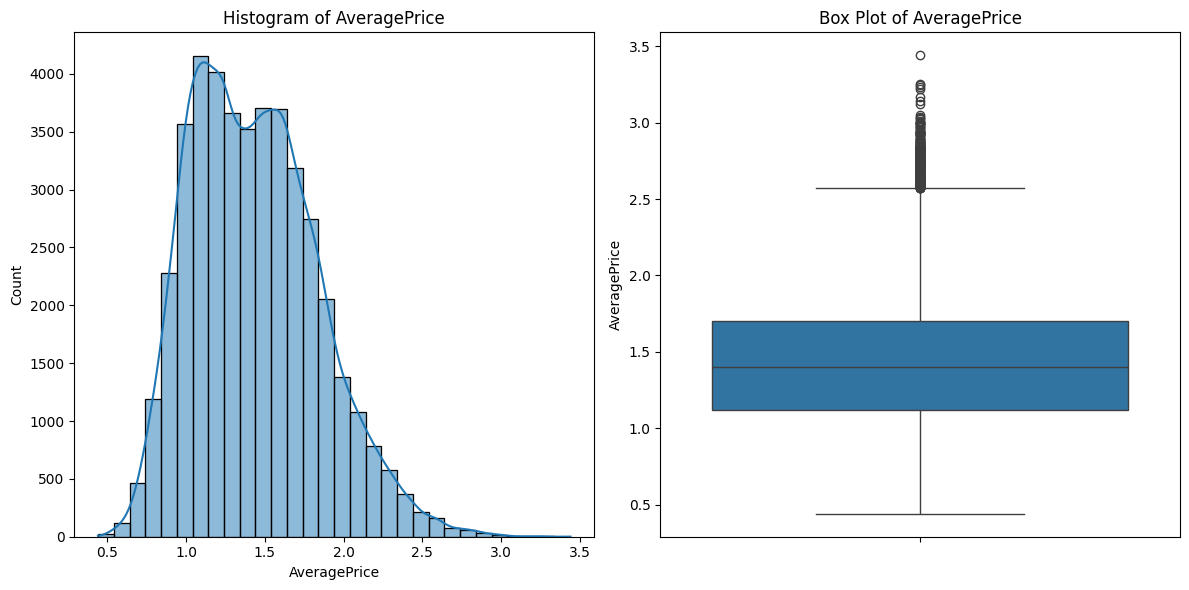


Analysis for TotalVolume:

count    4.316100e+04
mean     1.895182e+05
std      3.394600e+05
min      1.310000e+00
25%      4.670940e+03
50%      4.568833e+04
75%      2.345122e+05
max      5.470227e+06
Name: TotalVolume, dtype: float64


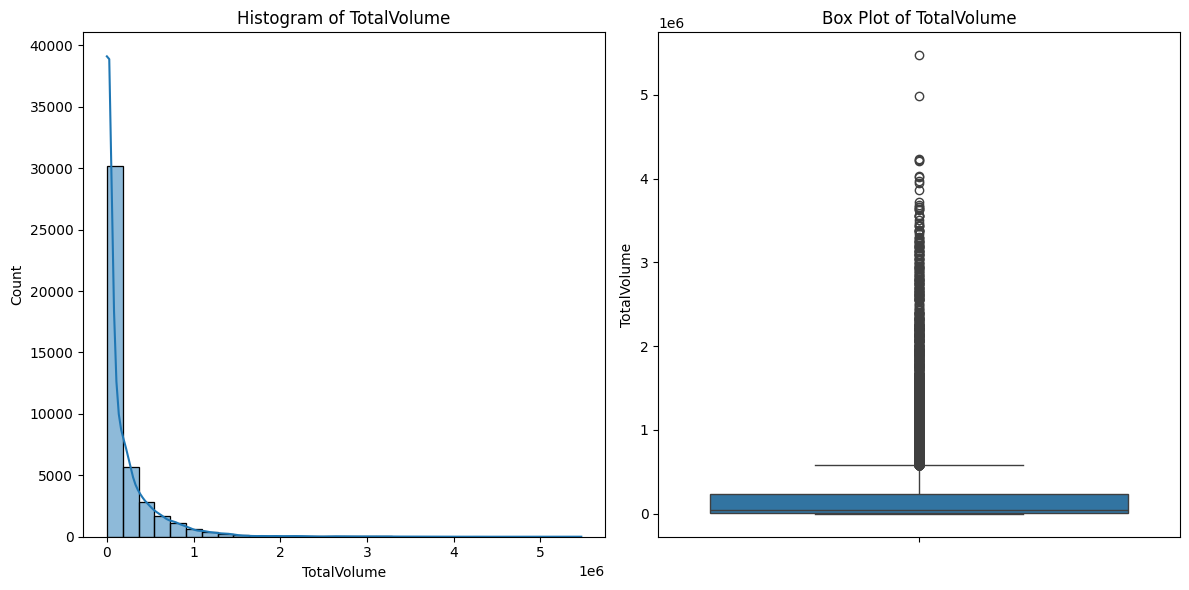


Analysis for plu4046:

count    4.316100e+04
mean     8.562479e+04
std      1.810551e+05
min      0.000000e+00
25%      4.314100e+02
50%      8.035790e+03
75%      9.490967e+04
max      2.914047e+06
Name: plu4046, dtype: float64


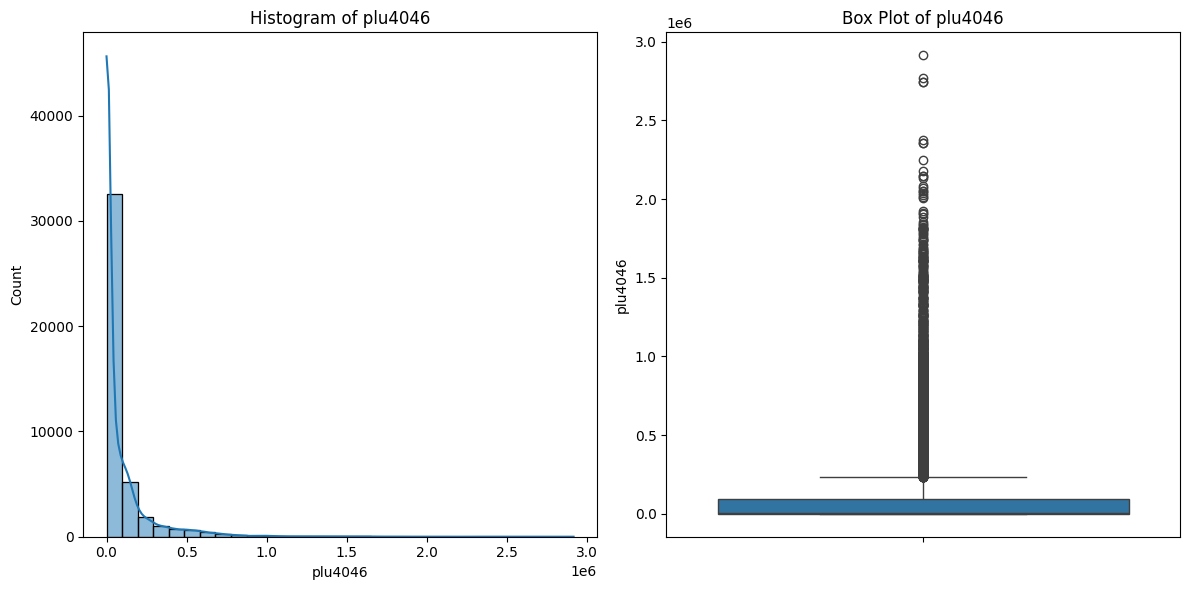


Analysis for plu4225:

count    4.316100e+04
mean     6.690945e+04
std      1.469630e+05
min      0.000000e+00
25%      1.425120e+03
50%      1.010975e+04
75%      6.155035e+04
max      2.537927e+06
Name: plu4225, dtype: float64


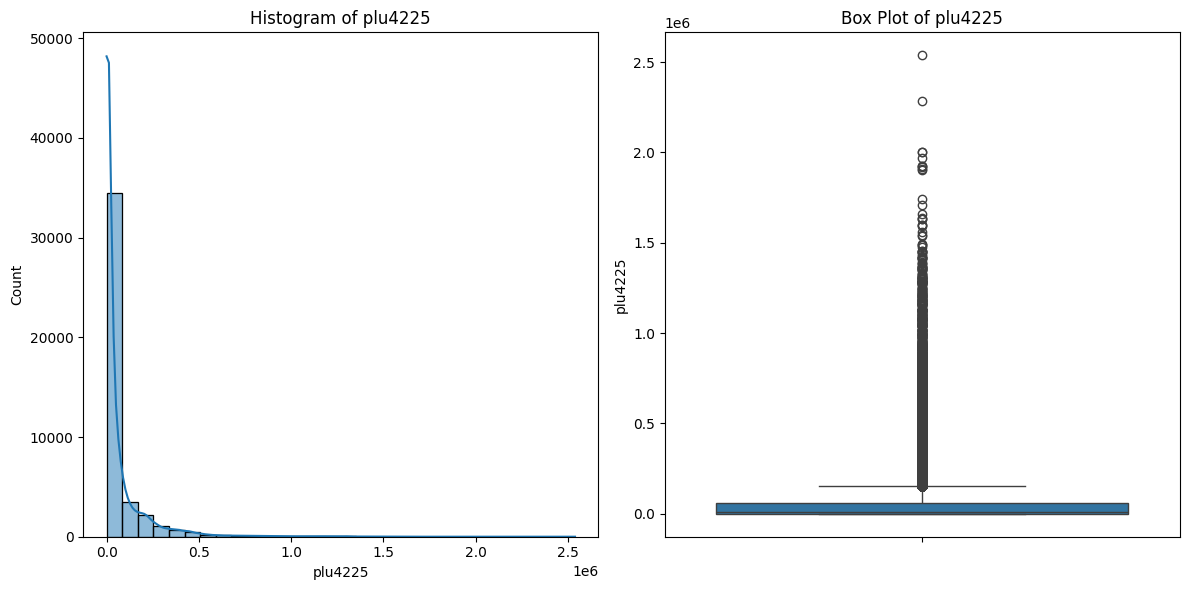


Analysis for plu4770:

count    4.316100e+04
mean     6.555168e+03
std      2.961860e+04
min      0.000000e+00
25%      0.000000e+00
50%      4.581000e+01
75%      2.121580e+03
max      1.156849e+06
Name: plu4770, dtype: float64


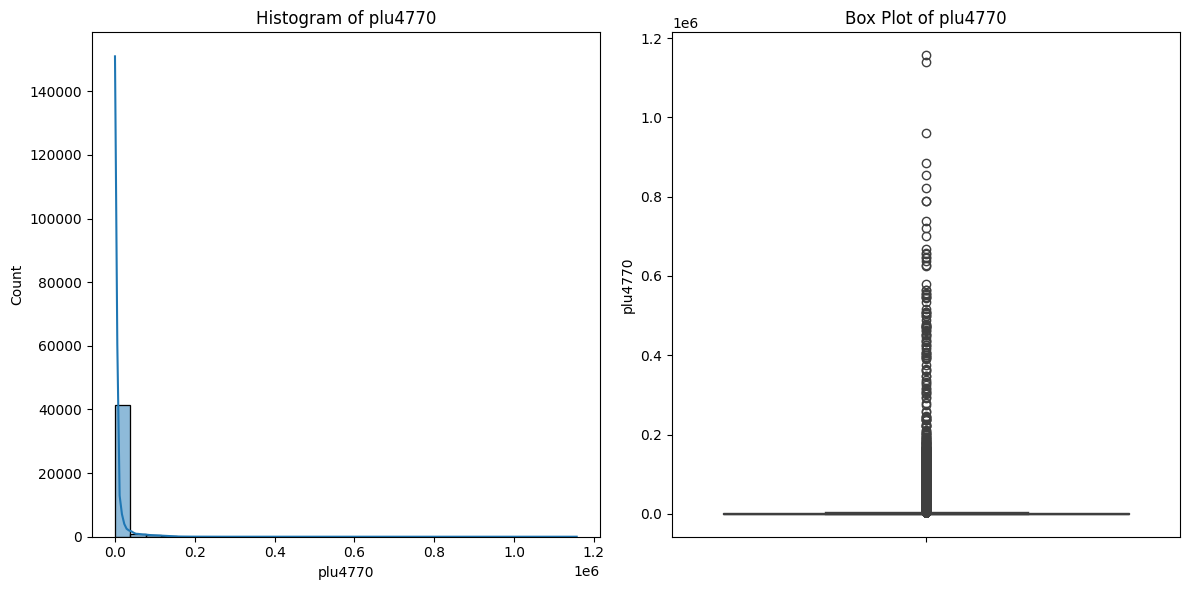


Analysis for TotalBags:

count    4.316100e+04
mean     3.042880e+04
std      9.671547e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.195339e+04
max      2.701610e+06
Name: TotalBags, dtype: float64


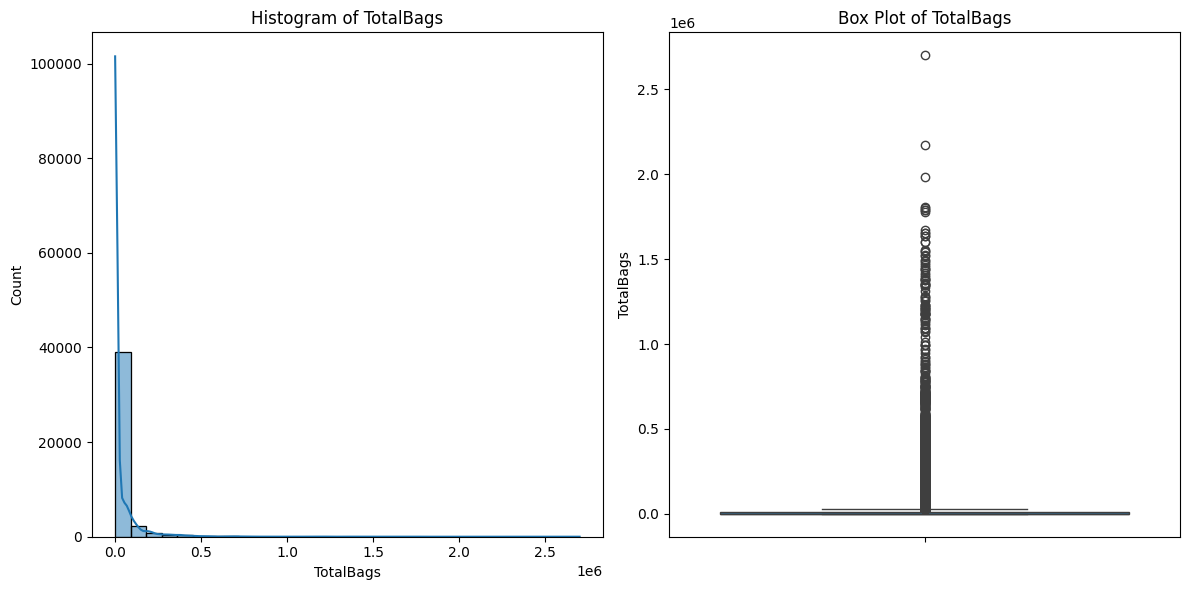


Analysis for SmallBags:

count    4.316100e+04
mean     2.453988e+04
std      8.442265e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      9.696890e+03
max      2.656630e+06
Name: SmallBags, dtype: float64


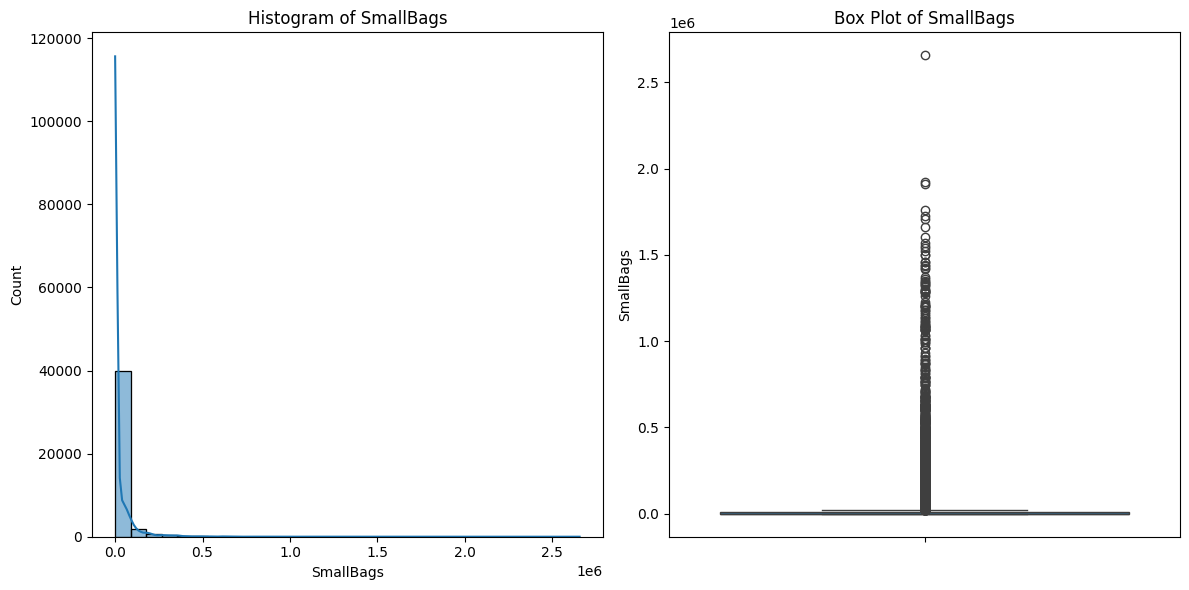


Analysis for LargeBags:

count     43161.000000
mean       5271.648072
std       24425.739406
min           0.000000
25%           0.000000
50%           0.000000
75%         419.640000
max      706052.840000
Name: LargeBags, dtype: float64


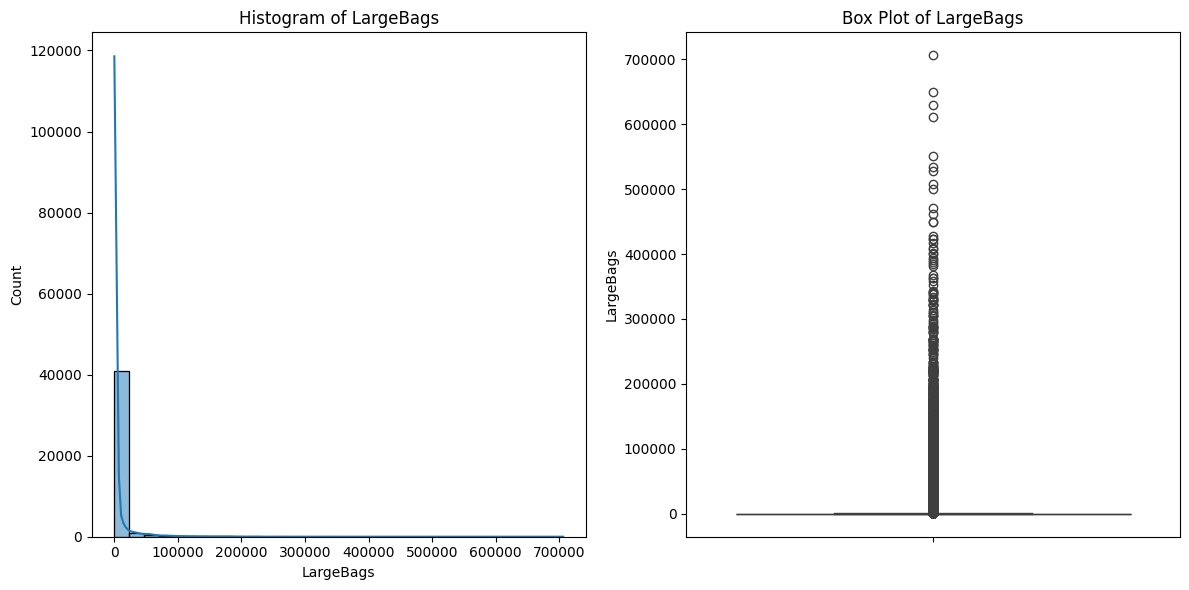


Analysis for XLargeBags:

count    43161.000000
mean       617.280788
std       3564.862733
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      66814.760000
Name: XLargeBags, dtype: float64


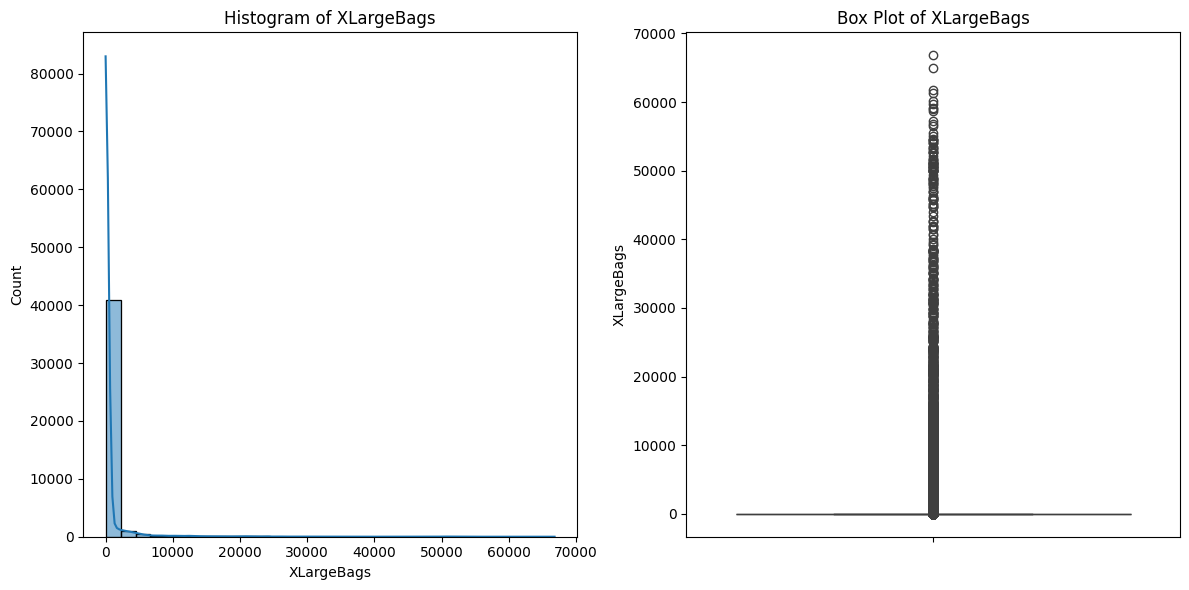

In [7]:
# Perform univariate analysis
univariate_analysis(city_level_data)

## Correlation Analysis

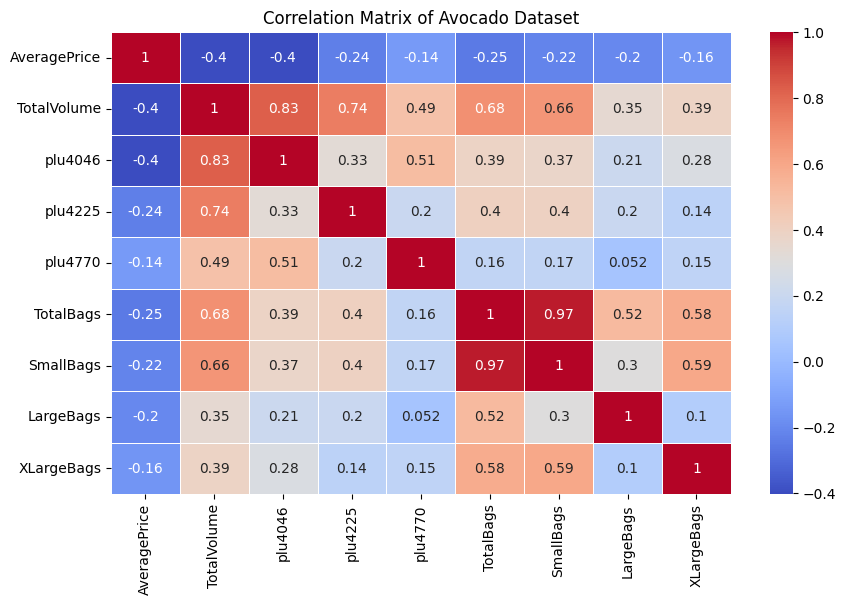

In [5]:
numeric_data = city_level_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = numeric_data.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Avocado Dataset")
plt.show()

TotalBags (highly correlated with SmallBags)

plu4046 (highly correlated with TotalVolume)

# Prepare the data
- Fix Skewness
- Encoding Categorical Variables
- Remove Unnessesary
- Feature Scaling

## Fix Skewness

In [8]:
city_level_data_prep = city_level_data.copy()

In [9]:
city_level_data_prep['AveragePrice'] = np.log1p(city_level_data_prep['AveragePrice'])

In [ ]:
numeric_cols = city_level_data_prep.select_dtypes(include=['float64', 'int64']).columns.drop(['AveragePrice', 'TotalBags'], errors='ignore')

skewness = city_level_data_prep[numeric_cols].skew().sort_values(ascending=False)
print("Skewness before transformation:\n", skewness)

skewed_features = skewness[abs(skewness) > 0.75].index

for col in skewed_features:
    city_level_data_prep[col] = np.log1p(city_level_data_prep[col])

print("Skewness fixed for:", list(skewed_features))

Skewness before transformation:
 plu4770        14.960223
LargeBags      10.065467
XLargeBags      9.677461
SmallBags       9.364425
plu4225         4.753747
plu4046         4.433780
TotalVolume     3.928624
dtype: float64
Skewness fixed for: ['plu4770', 'LargeBags', 'XLargeBags', 'SmallBags', 'plu4225', 'plu4046', 'TotalVolume']


## Check if the process worked


Analysis for AveragePrice:

count    43161.000000
mean         0.876453
std          0.163535
min          0.364643
25%          0.750448
50%          0.875469
75%          0.993252
max          1.490841
Name: AveragePrice, dtype: float64


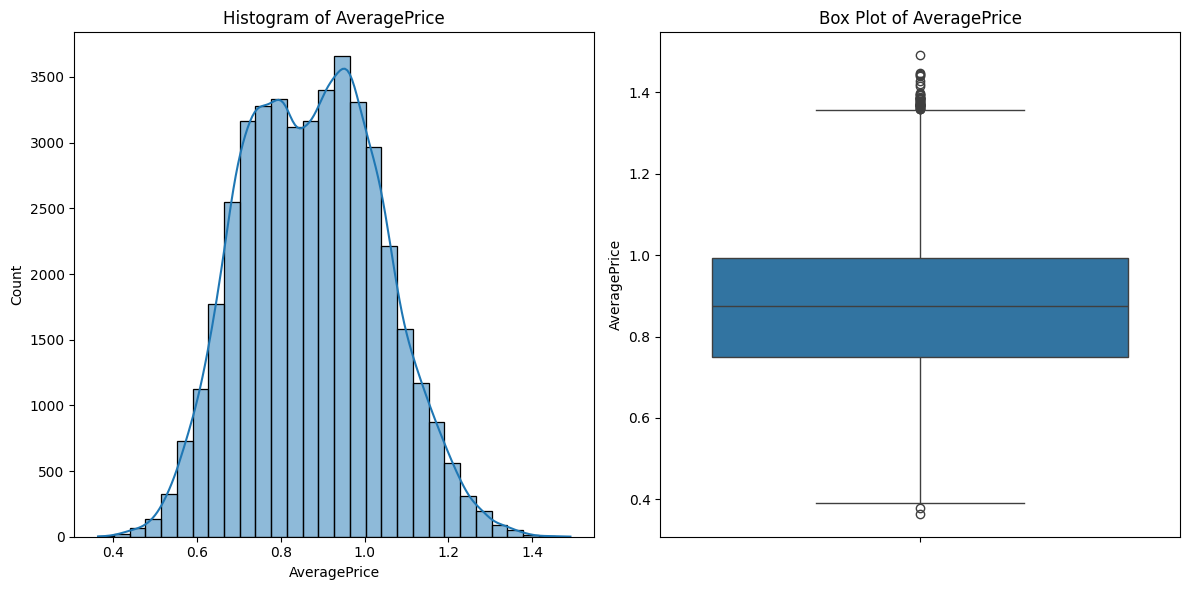


Analysis for TotalVolume:

count    43161.000000
mean        10.340940
std          2.395515
min          0.837248
25%          8.449330
50%         10.729620
75%         12.365267
max         15.514831
Name: TotalVolume, dtype: float64


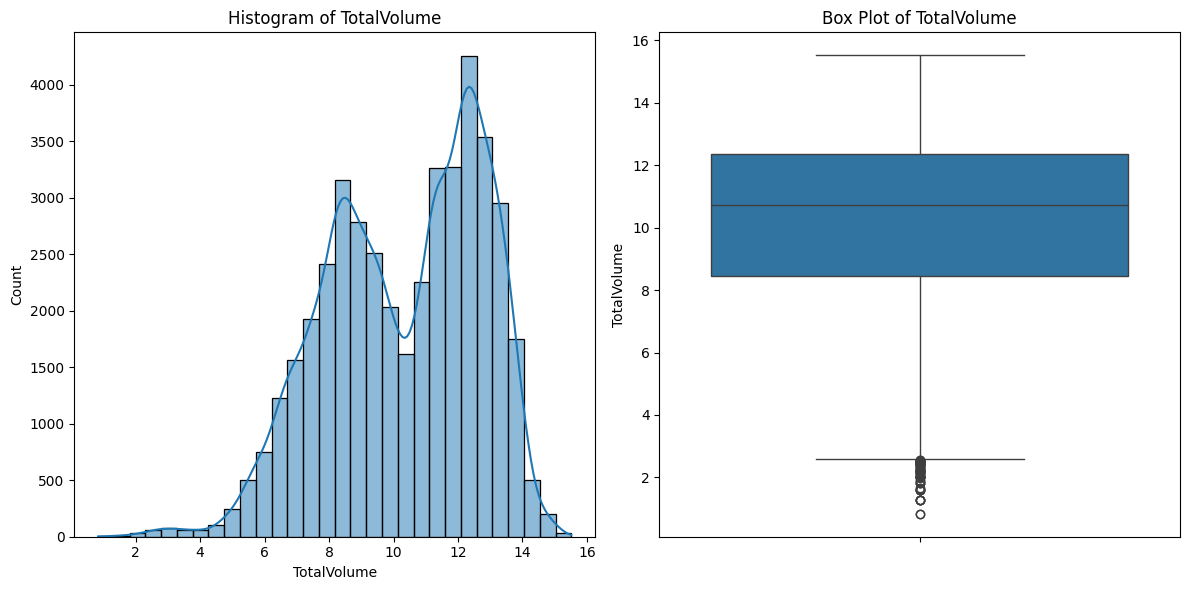


Analysis for plu4046:

count    43161.000000
mean         8.580533
std          3.286576
min          0.000000
25%          6.069374
50%          8.991785
75%         11.460691
max         14.885054
Name: plu4046, dtype: float64


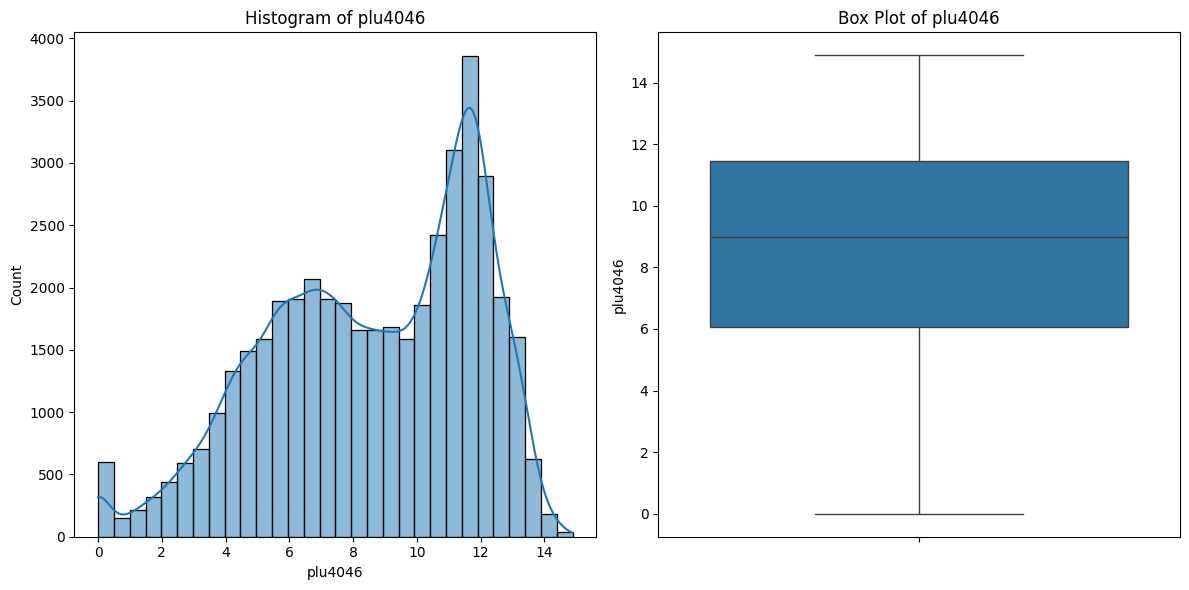


Analysis for plu4225:

count    43161.000000
mean         8.896237
std          2.829188
min          0.000000
25%          7.262713
50%          9.221354
75%         11.027627
max         14.746859
Name: plu4225, dtype: float64


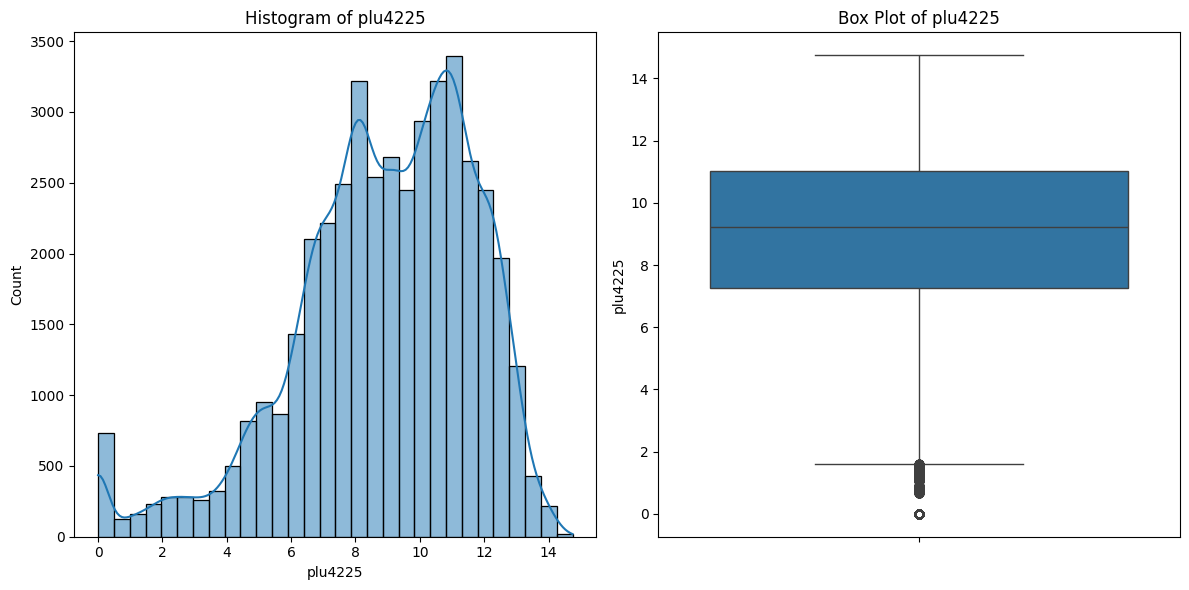


Analysis for plu4770:

count    43161.000000
mean         4.073964
std          3.883358
min          0.000000
25%          0.000000
50%          3.846097
75%          7.660388
max         13.961211
Name: plu4770, dtype: float64


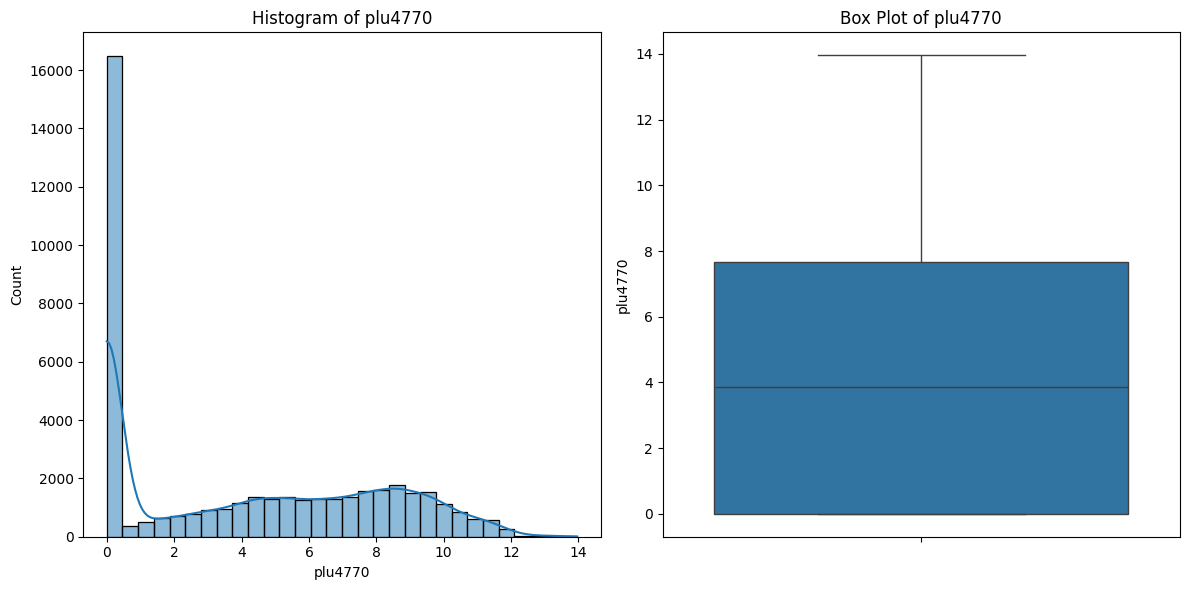


Analysis for TotalBags:

count    4.316100e+04
mean     3.042880e+04
std      9.671547e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.195339e+04
max      2.701610e+06
Name: TotalBags, dtype: float64


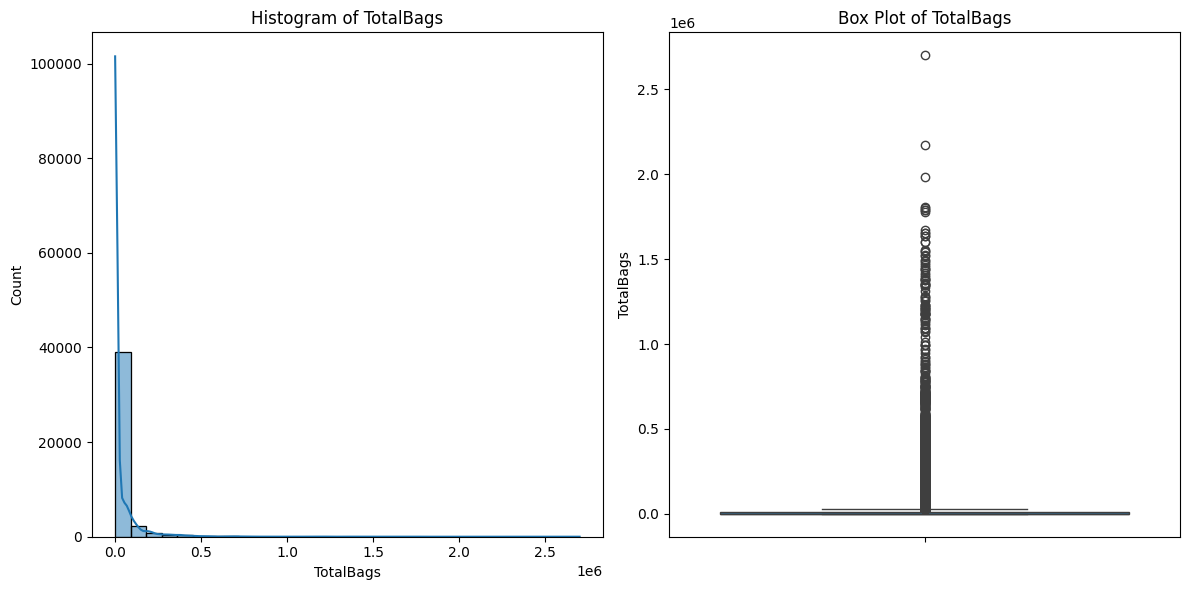


Analysis for SmallBags:

count    43161.000000
mean         3.933048
std          4.864262
min          0.000000
25%          0.000000
50%          0.000000
75%          9.179664
max         14.792569
Name: SmallBags, dtype: float64


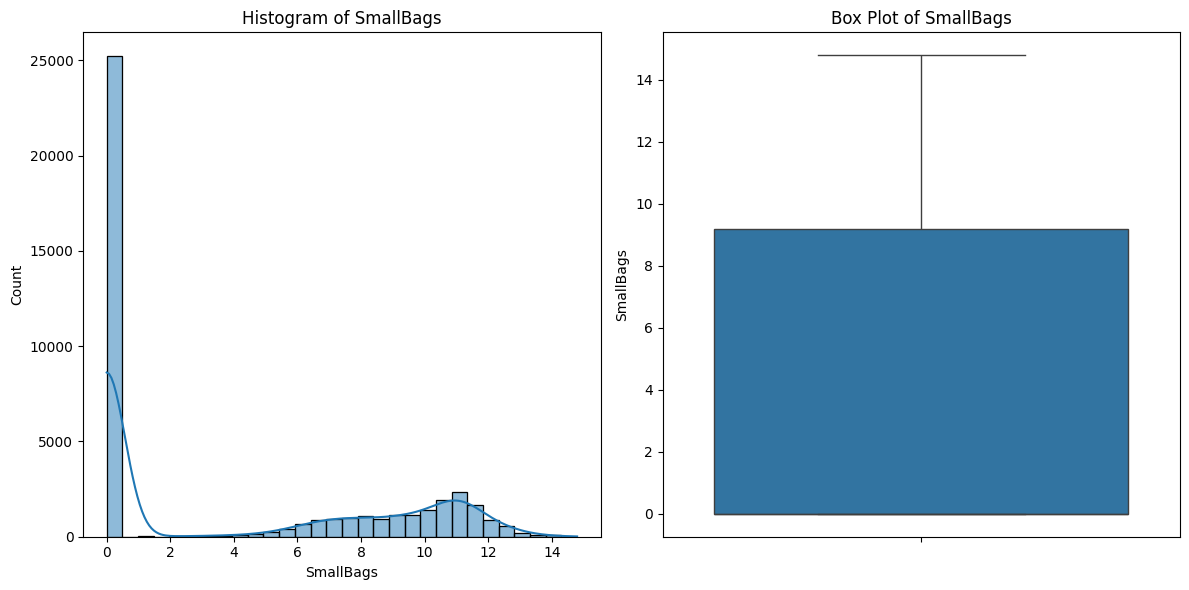


Analysis for LargeBags:

count    43161.000000
mean         2.524600
std          3.840935
min          0.000000
25%          0.000000
50%          0.000000
75%          6.041777
max         13.467447
Name: LargeBags, dtype: float64


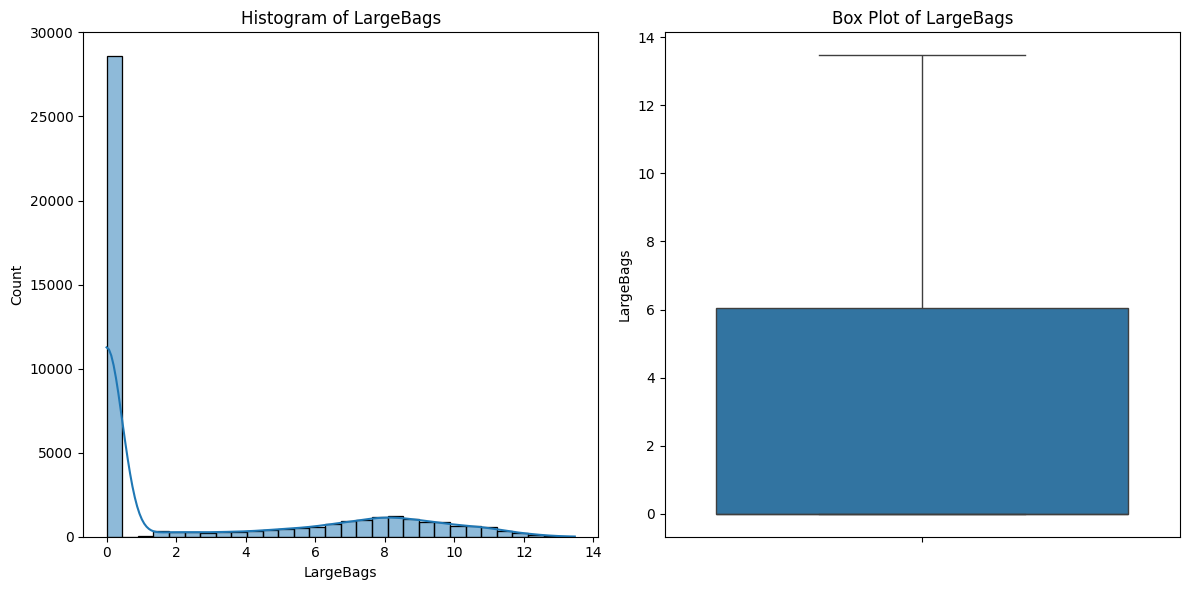


Analysis for XLargeBags:

count    43161.000000
mean         0.919099
std          2.449182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.109694
Name: XLargeBags, dtype: float64


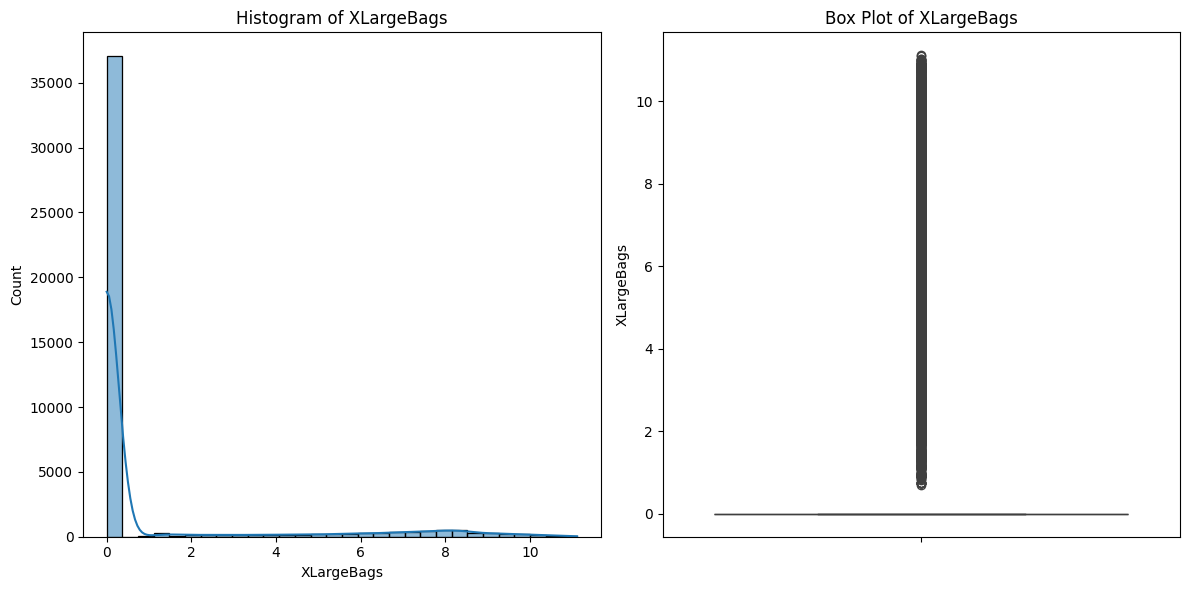

In [11]:
# Perform univariate analysis
univariate_analysis(city_level_data_prep)

# Drop featres

In [12]:
city_level_data_prep.drop(columns=['Date', 'TotalBags'], inplace=True)

## Encoding Categorical Variables

In [13]:
# Apply One-Hot Encoding
city_level_data_prep = pd.get_dummies(city_level_data_prep, columns=['type', 'region']).astype(float)

print("Categorical variables encoded!")

Categorical variables encoded!


In [14]:
city_level_data_prep.shape

(43161, 59)

In [15]:
city_level_data_prep.head()

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,SmallBags,LargeBags,XLargeBags,type_conventional,type_organic,...,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_Toledo,region_WestTexNewMexico,region_Wichita
0,0.797507,10.618256,7.944669,10.250208,3.929863,9.125646,6.273877,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.026042,7.226173,4.067658,5.042651,0.000000,7.059317,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.693147,12.983153,12.805742,10.078372,4.420646,9.723652,10.312601,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.015231,8.255228,7.313987,6.845188,0.000000,6.977608,5.822572,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.732368,13.577286,10.896523,13.222945,10.596535,11.828809,8.291950,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scaling

In [ ]:
numeric_cols = city_level_data_prep.select_dtypes(include=['float64', 'int64']).columns.drop('AveragePrice', errors='ignore')

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(city_level_data_prep[numeric_cols])

scaled_df = pd.DataFrame(scaled_features, columns=numeric_cols, index=city_level_data_prep.index)

city_level_data_prep[numeric_cols] = scaled_df

print("Data scaling completed (excluding 'AveragePrice').")

Data scaling completed (excluding 'AveragePrice').


In [17]:
city_level_data_prep

,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,SmallBags,LargeBags,XLargeBags,type_conventional,type_organic,...,region_SanDiego,region_SanFrancisco,region_Seattle,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_Toledo,region_WestTexNewMexico,region_Wichita
0,0.797507,0.666391,0.533735,0.695077,0.281484,0.616907,0.465855,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.026042,0.435285,0.273271,0.341947,0.000000,0.477220,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.693147,0.827514,0.860309,0.683425,0.316638,0.657334,0.765743,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.015231,0.505395,0.491364,0.464179,0.000000,0.471697,0.432344,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.732368,0.867993,0.732045,0.896662,0.758998,0.799645,0.615703,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53408,0.961848,0.342150,0.339149,0.357807,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
53409,0.884238,0.334897,0.363472,0.306885,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
53410,0.936295,0.437332,0.357817,0.481474,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53412,0.962766,0.604151,0.646821,0.481482,0.000000,0.000000,0.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Train-Test Split

In [18]:
# Define target variable (y) and predictors (X)
X = city_level_data_prep.drop(columns=['AveragePrice'])
y = city_level_data_prep['AveragePrice']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully!")

Data split successfully!


# Multiple Linear Regression

In [19]:
# Fit a linear regression model
X = sm.add_constant(X)
y = city_level_data_prep['AveragePrice']
model = sm.OLS(y, X).fit()

# Print the summary of the linear regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1107.
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        10:14:26   Log-Likelihood:                 36143.
No. Observations:               43161   AIC:                        -7.217e+04
Df Residuals:                   43104   BIC:                        -7.168e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

# Train and Evaluate Models
We will use:

- Linear Regression
- Gradient Boosting Regressor
- Random Forest Regressor
- XGB Regressor
- MLP Regressor (Neural Network)

We evaluate using Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R²

# Feature Selection with Lasso

In [20]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas=np.logspace(-4, 1, 50), cv=5).fit(X_train, y_train)
print("Optimal Alpha:", lasso.alpha_)

Optimal Alpha: 0.0001


In [ ]:
# Function to apply SelectFromModel with Lasso and return selected features
def select_features(X, y, alpha):
    lasso = Lasso(alpha=alpha, random_state=42)
    selector = SelectFromModel(lasso, prefit=False)  
    selector.fit(X, y)
    selected_features = X.columns[selector.get_support()].tolist()
    return selected_features

alphas = [0.0001, 0.0005, 0.002]
selected_features_dict = {}

for alpha in alphas:
    selected_features_dict[alpha] = select_features(X_train, y_train, alpha)

for alpha, features in selected_features_dict.items():
    print(f"Alpha={alpha}, Selected Features: {features}")

Alpha=0.0001, Selected Features: ['TotalVolume', 'plu4046', 'plu4225', 'SmallBags', 'LargeBags', 'XLargeBags', 'type_conventional', 'region_Albany', 'region_Atlanta', 'region_BaltimoreWashington', 'region_BirminghamMontgomery', 'region_Boise', 'region_Boston', 'region_BuffaloRochester', 'region_Charlotte', 'region_Chicago', 'region_CincinnatiDayton', 'region_Columbus', 'region_DallasFtWorth', 'region_Denver', 'region_Detroit', 'region_GrandRapids', 'region_HartfordSpringfield', 'region_Houston', 'region_Indianapolis', 'region_Jacksonville', 'region_LasVegas', 'region_LosAngeles', 'region_Louisville', 'region_Miami', 'region_MiamiFtLauderdale', 'region_Nashville', 'region_NewOrleans', 'region_NewYork', 'region_Orlando', 'region_PeoriaSpringfield', 'region_Philadelphia', 'region_PhoenixTucson', 'region_Pittsburgh', 'region_Portland', 'region_Providence', 'region_RaleighGreensboro', 'region_RichmondNorfolk', 'region_Roanoke', 'region_Sacramento', 'region_SanDiego', 'region_SanFrancisco', 

#  Train models and compute metrics

In [ ]:
# Define function to train models and compute metrics
def evaluate_models(X_train, X_test, y_train, y_test, selected_features):
    models = {
        'Linear Regression': LinearRegression(),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'Random Forest Regression': RandomForestRegressor(random_state=42),
        'XGBoost': XGBRegressor(random_state=42),
        'Neural Network Regression': MLPRegressor(random_state=42, max_iter=500)
    }
    
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred_full = model.predict(X_test)
        
        model.fit(X_train[selected_features], y_train)
        y_pred_selected = model.predict(X_test[selected_features])
        
        results[name] = {
            "RMSE (Full)": np.sqrt(mean_squared_error(y_test, y_pred_full)),
            "MAE (Full)": mean_absolute_error(y_test, y_pred_full),
            "R² (Full)": r2_score(y_test, y_pred_full),
            "RMSE (Selected)": np.sqrt(mean_squared_error(y_test, y_pred_selected)),
            "MAE (Selected)": mean_absolute_error(y_test, y_pred_selected),
            "R² (Selected)": r2_score(y_test, y_pred_selected),
        }
    
    return pd.DataFrame(results).T

# Evaluate models with alpha=0.0001
results_0001 = evaluate_models(X_train, X_test, y_train, y_test, selected_features_dict[0.0001])
print("\nModel Performance (alpha=0.0001):")
display(results_0001)

# Evaluate models with alpha=0.0005
results_0005 = evaluate_models(X_train, X_test, y_train, y_test, selected_features_dict[0.0005])
print("\nModel Performance (alpha=0.0005):")
display(results_0005)

# Evaluate models with alpha=0.002
results_002 = evaluate_models(X_train, X_test, y_train, y_test, selected_features_dict[0.002])
print("\nModel Performance (alpha=0.002):")
display(results_002)


Model Performance (alpha=0.0001):


,RMSE (Full),MAE (Full),R² (Full),RMSE (Selected),MAE (Selected),R² (Selected)
Linear Regression,0.105953,0.081696,0.593916,0.105952,0.081687,0.593926
Gradient Boosting,0.099775,0.077331,0.639892,0.099658,0.077286,0.640737
Random Forest Regression,0.071619,0.052636,0.814455,0.074062,0.054744,0.801583
XGBoost,0.077965,0.058873,0.780120,0.078898,0.059869,0.774823
Neural Network Regression,0.091704,0.070489,0.695792,0.091610,0.070169,0.696419



Model Performance (alpha=0.0005):


,RMSE (Full),MAE (Full),R² (Full),RMSE (Selected),MAE (Selected),R² (Selected)
Linear Regression,0.105953,0.081696,0.593916,0.106577,0.082227,0.589116
Gradient Boosting,0.099775,0.077331,0.639892,0.100164,0.077851,0.637075
Random Forest Regression,0.071619,0.052636,0.814455,0.080961,0.060216,0.762895
XGBoost,0.077965,0.058873,0.780120,0.084449,0.064405,0.742026
Neural Network Regression,0.091704,0.070489,0.695792,0.099638,0.076929,0.640879



Model Performance (alpha=0.002):


,RMSE (Full),MAE (Full),R² (Full),RMSE (Selected),MAE (Selected),R² (Selected)
Linear Regression,0.105953,0.081696,0.593916,0.112634,0.087124,0.541085
Gradient Boosting,0.099775,0.077331,0.639892,0.104708,0.081432,0.603401
Random Forest Regression,0.071619,0.052636,0.814455,0.100498,0.076057,0.634656
XGBoost,0.077965,0.058873,0.780120,0.098096,0.075482,0.651909
Neural Network Regression,0.091704,0.070489,0.695792,0.109257,0.084866,0.568195


In [ ]:
data = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'XGBoost', 'Neural Network'],
    
    # Full model scores
    'RMSE_Full': [0.105953, 0.099775, 0.071619, 0.077965, 0.091704],
    'MAE_Full': [0.081696, 0.077331, 0.052636, 0.058873, 0.070489],
    'R2_Full': [0.593916, 0.639892, 0.814455, 0.780120, 0.695792],

    # Selected features (Alpha=0.0001)
    'RMSE_0001': [0.105952, 0.099658, 0.074062, 0.078898, 0.091610],
    'MAE_0001': [0.081687, 0.077286, 0.054744, 0.059869, 0.070169],
    'R2_0001': [0.593926, 0.640737, 0.801583, 0.774823, 0.696419],

    # Selected features (Alpha=0.0005)
    'RMSE_0005': [0.106577, 0.100164, 0.080961, 0.084449, 0.099638],
    'MAE_0005': [0.082227, 0.077851, 0.060216, 0.064405, 0.076929],
    'R2_0005': [0.589116, 0.637075, 0.762895, 0.742026, 0.640879],

    # Selected features (Alpha=0.002)
    'RMSE_002': [0.112634, 0.104708, 0.100498, 0.098096, 0.109257],
    'MAE_002': [0.087124, 0.081432, 0.076057, 0.075482, 0.084866],
    'R2_002': [0.541085, 0.603401, 0.634656, 0.651909, 0.568195]
}

df = pd.DataFrame(data)

<Figure size 1000x500 with 0 Axes>

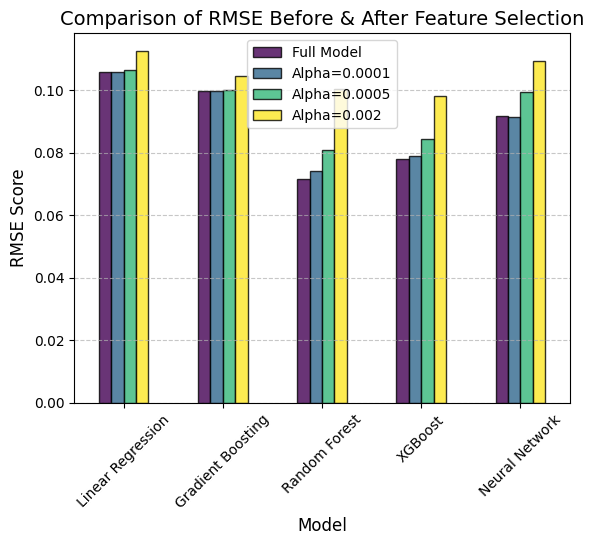

<Figure size 1000x500 with 0 Axes>

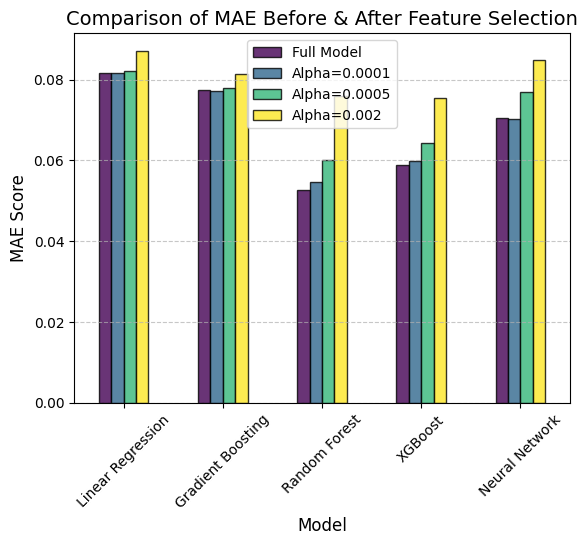

<Figure size 1000x500 with 0 Axes>

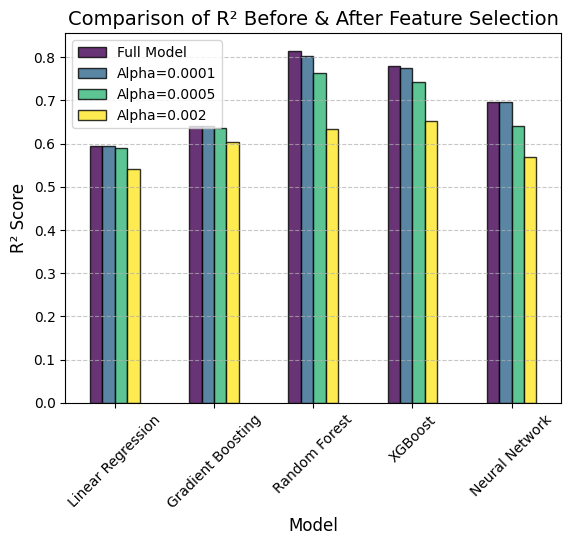

In [ ]:
# Function to plot comparison bar charts
def plot_metric_comparison(metric, title, ylabel):
    plt.figure(figsize=(10, 5))
    
    metrics_df = df[['Model', f'{metric}_Full', f'{metric}_0001', f'{metric}_0005', f'{metric}_002']]
    metrics_df.set_index('Model', inplace=True)
    
    metrics_df.plot(kind='bar', colormap='viridis', edgecolor='black', alpha=0.8)
    
    plt.title(title, fontsize=14)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlabel("Model", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(["Full Model", "Alpha=0.0001", "Alpha=0.0005", "Alpha=0.002"], loc='best')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

plot_metric_comparison('RMSE', "Comparison of RMSE Before & After Feature Selection", "RMSE Score")
plot_metric_comparison('MAE', "Comparison of MAE Before & After Feature Selection", "MAE Score")
plot_metric_comparison('R2', "Comparison of R² Before & After Feature Selection", "R² Score")